In [1]:
import numpy as np
import torch
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

from npi_demo.binarize import Binarization

/home/daniel/anaconda3/envs/npi/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
p = "/home/daniel/Documents/sunia/data/images"
filepaths = [x for x in Path(p).glob("*.png")]
img = cv2.imread(filepaths[200])

br = Binarization()
img_pp = br.preprocess(img)
# Actual preprocessed is 255 - img_pp

img_rs = br.resize(255 - img_pp)

# Use binarized image only to segment the text further:
img_bin = br.binarize(img_pp)
img_bin = np.clip(255 * img_bin.astype(np.int32), 0, 255).astype(np.uint8)

img_bin_rs = br.resize(img_bin)
img_bin_rs = br.binarize_simple(img_bin_rs)


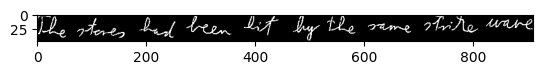

In [5]:
plt.imshow(img_bin_rs, cmap="gray")

In [7]:
np.unique(img_bin_rs)

array([0, 1])